# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train = train['features'], train['labels']
X_test_raw, y_test = test['features'], test['labels']




In [7]:
import numpy as np
a = len(np.unique(y_train))
print(a)
type(y_train)

43


numpy.ndarray

In [17]:
classID,indexes = np.unique(y_train,return_index=True)
print(classID)
print(indexes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[    0   210  2430  4680  6090  8070  9930 10350 11790 13200 14670 16680
 18000 20100 22260 23040 23670 24090 25200 26400 26610 26970 27300 27690
 28200 28470 29970 30570 30810 31350 31620 32070 32850 33090 33779 34199
 35399 35789 35999 38069 38369 38729 38969]


In [6]:
# Normalize the train & test image
import skimage.data
import skimage.transform
X_train = []
X_test = []
for X in X_train_raw:
    X_train.append(skimage.transform.resize(X, (32, 32)))
for X in X_test_raw:
    X_test.append(skimage.transform.resize(X, (32, 32)))
for X in X_train[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(X.shape, X.min(), X.max()))

shape: (32, 32, 3), min: 0.20784313725490353, max: 1.0
shape: (32, 32, 3), min: 0.20784313725490208, max: 1.0
shape: (32, 32, 3), min: 0.19607843137254935, max: 1.0
shape: (32, 32, 3), min: 0.1450980392156873, max: 1.0
shape: (32, 32, 3), min: 0.17254901960784336, max: 1.0


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [8]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [9]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

10


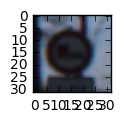

In [10]:

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

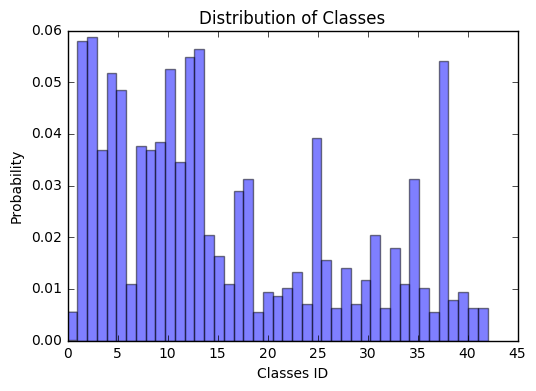

In [12]:
# the histogram of the classes  
n, bins, patches = plt.hist(y_train, n_classes, normed=1, facecolor='blue', alpha=0.5)  
plt.xlabel('Classes ID')  
plt.ylabel('Probability')  
plt.title(r'Distribution of Classes')  
      
    # Tweak spacing to prevent clipping of ylabel  
plt.subplots_adjust(left=0.15)  
plt.show()  

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
#X =  np.array([1,2,3,4,5])
#X = shuffle(X)
#print(X)
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer** First I shuffle the training data becasue the order of the data may have a huge effect on how well the network trains.

In [18]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print(len(X_train), len(X_validation))
print(len(X_validation)/len(X_train))
#print(len(X_train), len(X_validation), len(X_test))


31367 7842
0.250007970159722


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**I slice out 20% dataset from training set as validation set. So the numbers of training set, validation set and test set are 31367, 7842, and 12630 respectively. The training set is used to fit the models; the validation set is used to estimate prediction error for model selection; the test set is used for assessment of the generalization error of the final chosed model.

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Converlutional Input = 32 x 32 x 3  Output = 28 x 28 x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    #SOLUTION: Activation
    conv1 = tf.nn.relu(conv1)
    
    #SOLUTION: Pooling. Input = 28 x 28 x 6.  Output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='VALID')
    
    #SOLUTION: Layer 2: Converlutional. Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding = 'VALID')
    
    #SOLUTION: Activation
    conv2 = tf.nn.relu(conv2)
    
    #SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    #SOLUTION: Flatten. Input = 5x5x16  Output = 400
    fc0   = flatten(conv2)
    
    #SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape = [400, 120], mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #SOLUTION: Activation
    fc1   = tf.nn.relu(fc1)
    
    #SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84. 
    fc2_W = tf.Variable(tf.truncated_normal(shape = [120, 84], mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    #SOLUTION: Activation
    fc2   = tf.nn.relu(fc2)
    
    #SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape = [84, 43], mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I use the LeNet-5 neural network architecture.
INPUT: 
The LeNet-5 architecture accepts a 32x32x3 image as input. The color channel is 3 because traffic sign images are colorful, not gray.
ARCHITECTURE:
Layer 1: Convolutional. The output shape is 28x28x6
Activation: I use the relu function as activation function.
Pooling: I use the max pooling method and the output shape is 14x14x6
Layer 2: Convolutional. The output shape is 10x10x16.
Activation: I use the relu function as activation function.
Pooling: I use the max pooling method and the output shape is 5x5x16
Flatten: I import tf.contrib.layers.flatten to reshape the final pooling layer from 3D:5x5x16 to 1D:400
Layer 3: Fully Connected. The output size is 1x120
Activation: I use the relu function as activation function.
Layer 4: Fully Connected. The output size is 1x84
Activation: I use the relu function as activation function.
Layer 5: Fully Connected. Logits.Since the traffic sign datasets have 43 classes, so the logits have 43 outputs


In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

#EPOCHS = 10
EPOCHS = 10
BATCH_SIZE = 128



# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training Pipeline
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.718

EPOCH 2 ...
Validation Accuracy = 0.897

EPOCH 3 ...
Validation Accuracy = 0.943

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.960

EPOCH 6 ...
Validation Accuracy = 0.958

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.977

EPOCH 9 ...
Validation Accuracy = 0.972

EPOCH 10 ...
Validation Accuracy = 0.978

Model saved


In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.906


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
First, I create the tensorflow session and initialize the variables.
Then train over number of epoch times, and epoch is a hyperparameter
Before each epoch, shuffle the training set to ensure training isn't biased by the order of the images. Then break training data into batches and train the model on each batch. 

I use the AdamOptimizer, choose a batch size equals 128 and epochs equals 10, learning rate equals 0.001.

After each epoch, measure the loss and accuracy of the validation set.
Finally, save the model for convenience of loading it up later and modifying it and I can evaluate the model on test data.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**I used LeNet Lab method as a solution to this problem, which was first proposed by Yan LeCun in 1998. The steps as follow: 
First,load the traffic signs data including training set and test set, check the number of training and test examples, shape of image, number of classes. Then visualize the data to have a ituition about what to be classified. Finally, use the LeNet-5 architecture to train the model, first 2 layers are convolutional, activation and max pooling, then followed by 3 fully connected layers. Because LeNet architecture is suitable for MNIST claffication problem, and the traffic signs dataset are similiar with MNIST except the images have 3 color channel and 43 classes. So I think LeNet will work well for traffic signs classification.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


In [22]:
#1. import the needed libraries
import os
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [23]:
#2. Load the training data
# Here I used the Belgium Traffic Signs and downloaded the training & testing datasets from http://btsd.ethz.ch/shareddata/

def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

train_data_dir = 'C:\\Users\\think\\traffic-signs-tensorflow-master\\traffic\\datasets\\BelgiumTS\\Training'
test_data_dir = 'C:\\Users\\think\\traffic-signs-tensorflow-master\\traffic\\datasets\\BelgiumTS\\Testing'
images, labels = load_data(train_data_dir)

In [24]:
#3. Explore the dataset and display the first image of label
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


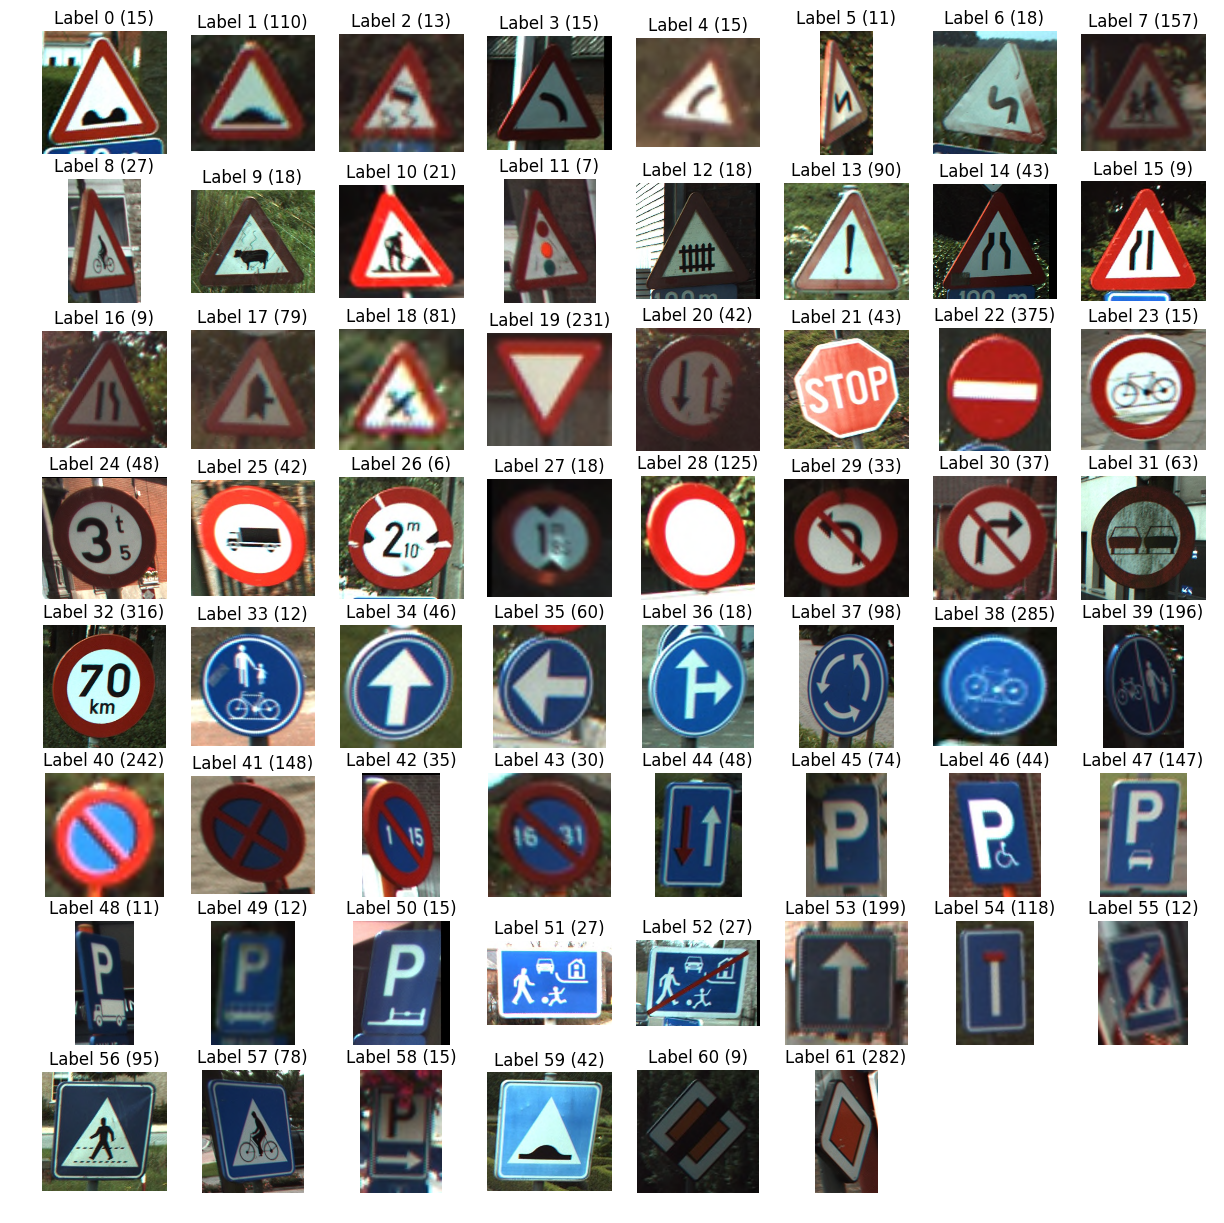

In [47]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

In [26]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

#display_label_images(images, 0)

In [27]:
# 4. check the image sizes
for image in images[0:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (141, 142, 3), min: 0, max: 255
shape: (120, 123, 3), min: 0, max: 255
shape: (105, 107, 3), min: 0, max: 255
shape: (94, 105, 3), min: 7, max: 255
shape: (128, 139, 3), min: 0, max: 255


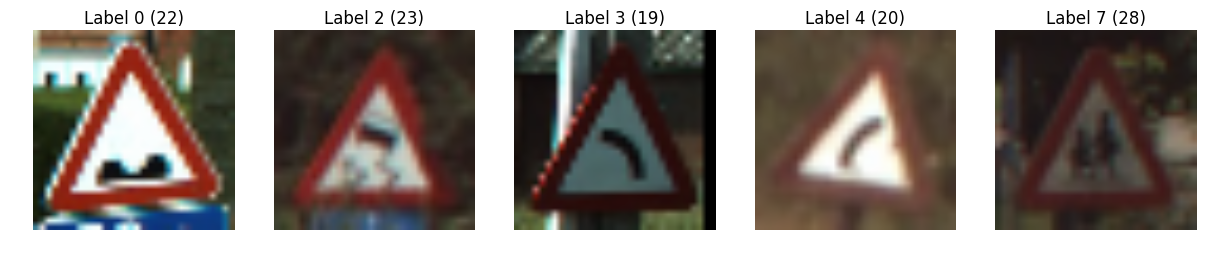

In [28]:
# 5. Resize images to 32x32  because the LeNet architecture abobe only receive traffic sign image whoese size is 32x32
images32 = []
for image in images:
    images32.append(skimage.transform.resize(image, (32, 32)))

"""Display the first image of labels 0, 2, 3, 4, 7 which corresponds to GTSRB's class ID 22, 23, 19, 20, 28  ."""
def display_images_and_labels5(images, labels):
    unique_labels = set([0,2,3,4,7])
    plt.figure(figsize=(15, 15))
    i = 1
    j = 0
    classID = [22, 23, 19, 20, 28]
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(1, 5, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, classID[j]))
        j += 1
        i += 1
        _ = plt.imshow(image)
    plt.show()
display_images_and_labels5(images32, labels)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**I choose five candidate images from Belgium Traffic Signs dataset, which are the first image of labels 0, 2, 3, 4, 7 corresponding to GTSRB's class ID 22, 23, 19, 20, 28.  I think the light condition of images might bring difficulty for classfication.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

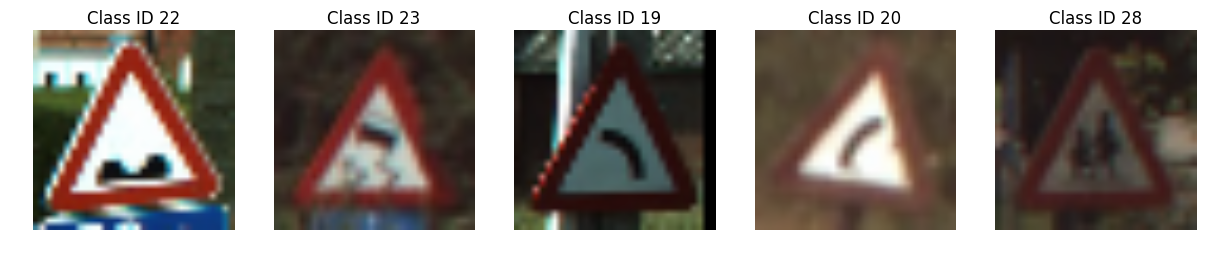

In [39]:
unique_labels = set([0,2,3,4,7])
i = 1
j = 0
classID = [22, 23, 19, 20, 28]
five_candidate_images = []
for label in unique_labels:
    five_candidate_images.append(images32[labels.index(label)])

plt.figure(figsize=(15, 15))
for image in five_candidate_images:
    plt.subplot(1, 5, i)
    plt.axis('off')
    plt.title("Class ID {0}".format(classID[j]))
    i += 1
    j += 1
    _ = plt.imshow(image)
plt.show()

In [38]:
#prediction = tf.argmax(logits, 1)
def predict(x_new):
    sess = tf.get_default_session()    
    prediction = tf.argmax(logits, 1)
    prediction_results = sess.run(prediction, feed_dict={x: x_new})
    return prediction_results

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    #logits = LeNet(x)
    
    prediction = predict(five_candidate_images)

    #test_accuracy = evaluate(five_candidate_images, y_test)
    print("Prediction  {0}".format(prediction))
    print("True ID  [22 23 19 20 28]")
    

Prediction  [22 23 19 28 28]
True ID  [22 23 19 20 28]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**As the prediction results show, 4 out of 5 images were correctly predicted, so the model prediction accuracy is 80%.

In [46]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def softmax(x_new):
    sess = tf.get_default_session()    
    softmax = tf.nn.softmax(logits)
    softmax_results = sess.run(softmax, feed_dict={x: x_new})
    softmax_results_topk = sess.run(tf.nn.top_k(tf.constant(softmax_results), k=3))
    return softmax_results_topk
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax_results_topk = softmax(five_candidate_images) 
    
    print(softmax_results_topk) 
    
    
    

TopKV2(values=array([[  1.00000000e+00,   2.58257540e-16,   1.24176896e-16],
       [  7.69089520e-01,   2.30157450e-01,   6.24738692e-04],
       [  7.12405801e-01,   2.78360248e-01,   4.53544036e-03],
       [  6.82973683e-01,   3.15597117e-01,   1.42870599e-03],
       [  9.98793364e-01,   5.41539048e-04,   4.55062400e-04]], dtype=float32), indices=array([[22, 18, 29],
       [23, 19, 21],
       [19, 21, 23],
       [28, 27, 20],
       [28, 20, 11]]))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**No 1,2,3 and 5 images are predicted correctly, and the 4th prediction was uncertain, however, the correct prediction "20" was in the top 3(in the 3rd position)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.